# Capstone Project: Electromobility Data Analysis

## 1. Introduction and Objective

Climate change is one of the greatest threats of the 21st century. It creates a risk for the natural environment as well as for human society. Climate change is associated with more frequent weather extremes, water and food shortages and the loss of ecosystems.  The largest driving force for climate change are greenhouse gas (GHG) emissions. Since 1850, the anthropogenic GHG emissions increased due to economic and population growth. The main source of anthro-pogenic GHG emissions are the combustion of fossil fuels for energy production. [2] 
The energy policy of the European Union aims to reduce GHG emission by at least 55 % by 2030 from 1990 levels. The Paris Agreement aims to limit the global warming to under 2 °C and pursues efforts to limit it to 1.5 °C. [3] The transport sector represents nearly a quarter of EU’s GHG emissions. The highest proportion of the transport emissions (71 % in 2018) can be traced back to road transport. In comparison to other sectors, the transport sector has not shown the same decrease of GHG emissions since 1990. Therefore, the deployment of low-emission alternative energy needs to be raised in the transport sector. [4] The further development of electromobility can play a crucial role for the reduction of GHG emissions if the electrical power is generated by renewable energy sources. [5]


In [935]:
# Focus auf EV Cars: hier irgendwie hervorheben
# Hypothesen formulieren
#Land Wie beliebt TRcuk, bus?
#Ladeinfrastruktur, wie verbreitet je Land, Verknüpfung zu Sales? -> mehr bauen
#PHEV, BEV? - wie beleibt je Land, Ladeinfrasturkur
#CO2 Regulatorien im Land, Subventionen für Elektroautos?
#Reichweite?
#Trend Verkäufe über Jahre? - mehr investieren in diese Länder
#Typ von Auto am beliebstesten

**Analysis Questions**
1. Distribution of sales and stock of different powertrain types (BEV (battery electric vehicle), PHEV (plug-in Hybrid electric vehicle), FCEV (Fuel Cell Electric vehicle))
2. Distribution of sales and stock of different modes (Cars, Buses, Vans, Trucks) worldwide over the last years?
3. Distribution of sales and stock of BEV and PHEV Cars to different countries in the last year.
4. Development of EV sales and EV stock since 2010.
5. Correlation between Charging points, EV stock and EV Sales #Ist Anteil an LAdesäulen pro Elektroauto am höchsten in den Ländern mit den meisten Sales/Stock
6. Forecast for different scenarios

## 2. Data Cleaning and Preparation

In [938]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [939]:
electromobility_df=pd.read_csv('IEA Global EV Data 2024.csv') # Source: [6] 

In [940]:
# leave out, what I did not use

**Data dictionary**:

|column name|content of column| values|
|--------|-------|-------|
|region|country, region or global| individual coountries, Regions (EU27, Europe (Europe includes the EU27, Norway, Iceland, Switzerland and United Kingdom), Rest of the world) or World|
|category|historical data or forecasts| Historical, Projection-STEPS (Stated Policies Scenario), Projection-APS (Announced Pledges Scenario)|
|parameter|parameter of the value |EV stock (EVs on the road), EV stock share, EV sales (New Electric car registration), EV sales share, EV charging points|
|mode|differentation of vehicle types|Cars, EV (electric vehicles), Buses, Vans, Trucks|
|powertrain|differentation of powertrain types |EV (electric vehicle), BEV (battery electric vehicle), PHEV (plug-in Hybrid electric vehicle), FCEV (Fuel Cell Electric vehicle)|
|year|historical years and forecast|historical (2010-2023), forecast for 2025, 2030 and 2035|
|unit|Definition of the unit of the value column|percent, number of vehicles, number of charging points|
|value|values of the corresponding parameter||ues 

In [942]:
electromobility_df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [943]:
#12654 rows without any missing values
electromobility_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [944]:
# Check for missing data: the data set is complete
electromobility_df.isnull().any().sum()

0

In [945]:
# check for diplicates: there are no duplicates
electromobility_df.duplicated().any()

False

In [946]:
# hier bereits Spalte mit Regionszuordnung einfügen

In [947]:
# Check the different parameters to which the values relate
electromobility_df.parameter.unique()

array(['EV stock share', 'EV sales share', 'EV sales', 'EV stock',
       'EV charging points', 'Electricity demand', 'Oil displacement Mbd',
       'Oil displacement, million lge'], dtype=object)

In [948]:
# Splitting the DataFrame 'electromobility_df' into one DataFrame for each relevant parameter

# Create DataFrame for EV Sales
EV_sales=electromobility_df[electromobility_df['parameter']=='EV sales']
EV_sales=EV_sales.drop('parameter', axis=1)
EV_sales=EV_sales.drop('unit', axis=1)
EV_sales=EV_sales.rename(columns={"value": "number of vehicles"})

# Create DataFrame for EV Sales Share
EV_sales_share=electromobility_df[electromobility_df['parameter']=='EV sales share']
EV_sales_share=EV_sales_share.drop('parameter', axis=1)
EV_sales_share=EV_sales_share.drop('unit', axis=1)
EV_sales_share=EV_sales_share.rename(columns={"value": "percent of vehicles"})

# Create DataFrame for EV Stock
EV_stock=electromobility_df[electromobility_df['parameter']=='EV stock']
EV_stock=EV_stock.drop('parameter', axis=1)
EV_stock=EV_stock.drop('unit', axis=1)
EV_stock=EV_stock.rename(columns={"value": "number of vehicles"})

# Create DataFrame for EV Stock Share
EV_stock_share=electromobility_df[electromobility_df['parameter']=='EV stock share']
EV_stock_share=EV_stock_share.drop('parameter', axis=1)
EV_stock_share=EV_stock_share.drop('unit', axis=1)
EV_stock_share=EV_stock_share.rename(columns={"value": "percent of vehicles"})

# Create DataFrame for EV Charging Points
EV_charging_points=electromobility_df[electromobility_df['parameter']=='EV charging points']
EV_charging_points=EV_charging_points.drop('parameter', axis=1)
EV_charging_points=EV_charging_points.drop('unit', axis=1)
EV_charging_points=EV_charging_points.rename(columns={"value": "number of charging points"})

In [949]:
EV_sales.head()

,region,category,mode,powertrain,year,number of vehicles
2,Australia,Historical,Cars,BEV,2011,49.0
5,Australia,Historical,Cars,BEV,2012,170.0
9,Australia,Historical,Cars,PHEV,2012,80.0
10,Australia,Historical,Cars,PHEV,2013,100.0
14,Australia,Historical,Cars,BEV,2013,190.0


In [950]:
# Laden in SQL Datenbank und erneutes Aufrufen hier

## 3. Explorative Data Analysis

**3.1 Distribution of EV Sales and Stock of Different Powertrain Types**

In [953]:
# Focus on global and historical EV Sales
EV_sales_h_gl=EV_sales[(EV_sales['category']=='Historical')  & (EV_sales['region']=='World')]
EV_sales_share_h_gl=EV_sales_share[(EV_sales_share['category']=='Historical')  & (EV_sales_share['region']=='World')]
EV_stock_h_gl=EV_stock[(EV_stock['category']=='Historical')  & (EV_stock['region']=='World')]
EV_stock_share_h_gl=EV_stock_share[(EV_stock_share['category']=='Historical')  & (EV_stock_share['region']=='World')]

In [954]:
# Create Pivot table for differentiation of powertrains for EV Sales and EV Stock
EV_sales_h_gl_powertrain_pivot = EV_sales_h_gl.pivot_table(index=['region', 'category', 'mode', 'year'], columns='powertrain', values='number of vehicles').reset_index()
EV_sales_h_gl_powertrain_pivot =EV_sales_h_gl_powertrain_pivot.groupby('year')[['BEV', 'PHEV','FCEV']].sum()

EV_stock_h_gl_powertrain_pivot = EV_stock_h_gl.pivot_table(index=['region', 'category', 'mode', 'year'], columns='powertrain', values='number of vehicles').reset_index()
EV_stock_h_gl_powertrain_pivot =EV_stock_h_gl_powertrain_pivot.groupby('year')[['BEV', 'PHEV','FCEV']].sum()
EV_stock_h_gl_powertrain_pivot.tail()

powertrain,BEV,PHEV,FCEV
year,,,
2019,5830000.0,2439888.0,24070.0
2020,7970000.0,3443110.0,33600.0
2021,12390000.0,5345450.0,51760.0
2022,19770000.0,8049920.0,72000.0
2023,30280000.0,12055300.0,88900.0


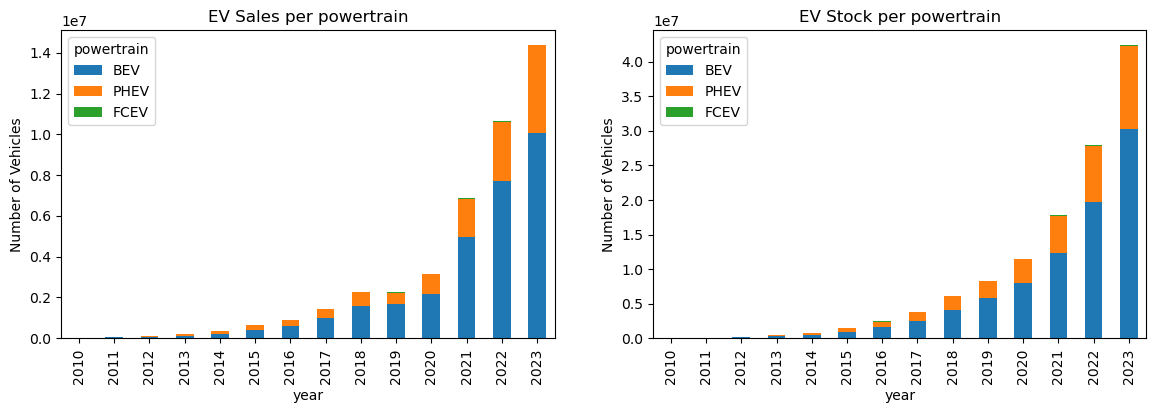

In [955]:
fig, ax= plt.subplots (1,2, figsize=(14,4))
EV_sales_h_gl_powertrain_pivot.plot(kind='bar',ax=ax[0], stacked=True)
ax[0].set_title('EV Sales per powertrain')
ax[0].set_ylabel('Number of Vehicles')
EV_stock_h_gl_powertrain_pivot.plot(kind='bar',ax=ax[1], stacked=True)
ax[1].set_title('EV Stock per powertrain')
ax[1].set_ylabel('Number of Vehicles')
plt.show()
plt.show()

Around 14 million EVs were sold in 2023. Sales of EVs have risen steadily. Full electric vehicles are the most poplar. FCEV only play a subordinate role. noch im Forschungstadium, Tanken fehlt, besonders abseits von Wasser. No information about the sales share. Corona als Einfluss?
Gechäft mit BEV und PHEV ist vielversprechend. Notwendig für Einhaltung der CO2 Ziele.

**3.2 Distribution of EV Sales and Stock of Different Modes**

In [958]:
# Create Pivot table for differentiation of modes
EV_sales_h_gl_mode_pivot = EV_sales_h_gl.pivot_table(index=['region', 'category', 'powertrain', 'year'], columns='mode', values='number of vehicles').reset_index()
EV_sales_h_gl_mode_pivot = EV_sales_h_gl_mode_pivot.groupby('year')[['Cars', 'Trucks','Buses','Vans']].sum()

EV_stock_h_gl_mode_pivot = EV_stock_h_gl.pivot_table(index=['region', 'category', 'powertrain', 'year'], columns='mode', values='number of vehicles').reset_index()
EV_stock_h_gl_mode_pivot = EV_stock_h_gl_mode_pivot.groupby('year')[['Cars', 'Trucks','Buses','Vans']].sum()
EV_stock_h_gl_mode_pivot.head()

mode,Cars,Trucks,Buses,Vans
year,,,,
2010,20445.0,1100.0,8506.0,7316.0
2011,67583.0,1300.0,11160.0,10266.0
2012,190110.0,1600.0,12680.0,21317.0
2013,390140.0,2400.0,15412.0,31426.0
2014,710210.0,2600.0,35561.0,43549.0


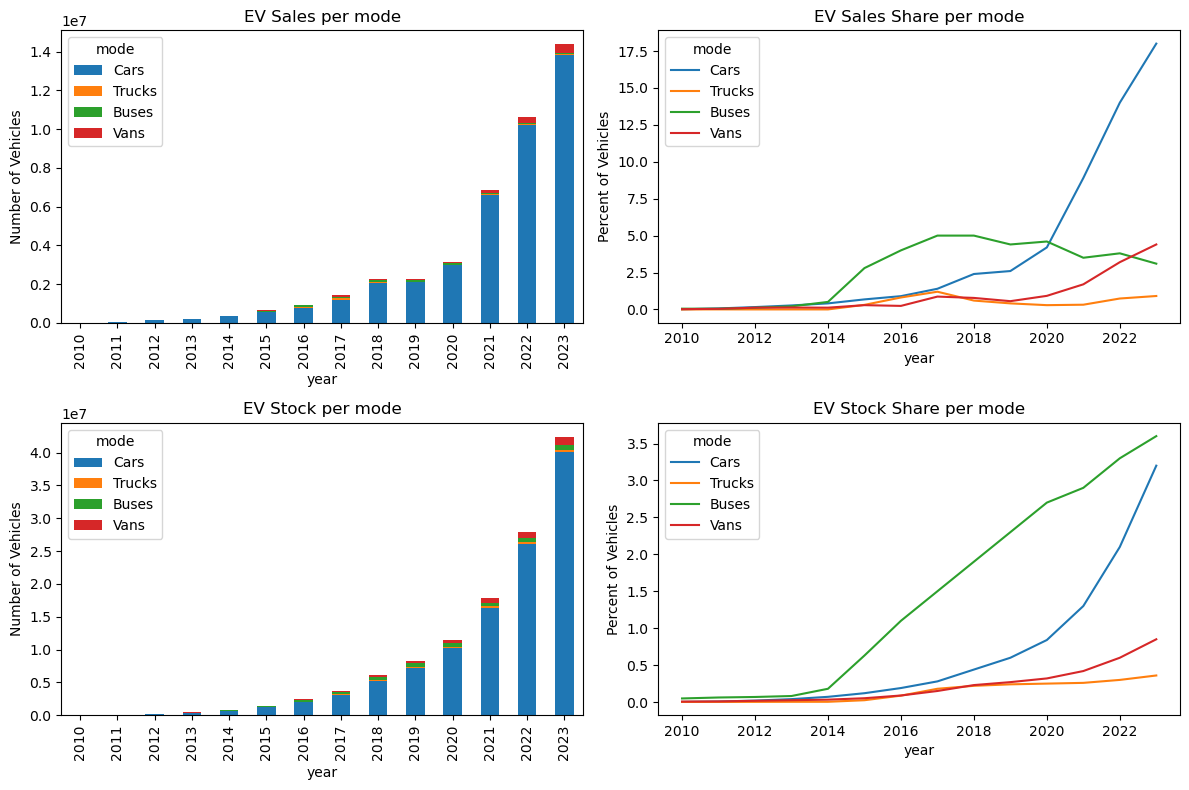

In [959]:
fig, ax= plt.subplots (2,2, figsize=(12,8))
EV_sales_h_gl_mode_pivot.plot(kind='bar',ax=ax[0,0], stacked=True)
ax[0,0].set_title('EV Sales per mode')
ax[0,0].set_ylabel('Number of Vehicles')
sns.lineplot(data=EV_sales_share_h_gl, ax=ax[0,1], x='year', y='percent of vehicles', hue='mode')
ax[0,1].set_title('EV Sales Share per mode')
ax[0,1].set_ylabel('Percent of Vehicles')
EV_stock_h_gl_mode_pivot.plot(kind='bar',ax=ax[1,0], stacked=True)
ax[1,0].set_title('EV Stock per mode')
ax[1,0].set_ylabel('Number of Vehicles')
sns.lineplot(data=EV_stock_share_h_gl, ax=ax[1,1], x='year', y='percent of vehicles', hue='mode')
ax[1,1].set_title('EV Stock Share per mode')
ax[1,1].set_ylabel('Percent of Vehicles')
plt.tight_layout()
plt.show()

Anzahlweise werden hauptsächlich EV Cars verkauft, Vans, Buses and Trucks wpielen eine untergeordnete Rolle. Aber der Sales Share von Buses ist als erstes gestiegen. Stagniert aber seit 2016 oder sinkt leicht. Wieso nicht attraktiv genug?
Cars Sales share steigt, aber nicht vn Trucks. Von Vans steigt es leicht seit 2020. Gründe?
The most sold EVs are Cars. Vans, Trucks and Buses only play a subordinate role. StockZahlen an Buse ist niedrig, aber höchster elektrifizierter Anteil; grüner ÖPNV ist wichtig für Bekämpfung Klimawandel. Grund weniger Buse als Autos benötigt.

In [961]:
# EV stock in 2023
EV_stock_2023=EV_stock_h_gl[EV_stock_h_gl['year']==2023]
EV_stock_2023_mode_pivot = EV_stock_2023.pivot_table(index=['region', 'category', 'mode', 'year'], columns='powertrain', values='number of vehicles').reset_index()
EV_stock_2023_mode_pivot_transposed=EV_stock_2023_mode_pivot[['mode', 'BEV', 'FCEV', 'PHEV']].set_index('mode').transpose()
EV_stock_2023_mode_pivot_transposed

mode,Buses,Cars,Trucks,Vans
powertrain,,,,
BEV,650000.0,28000000.0,330000.0,1300000.0
FCEV,8700.0,66000.0,11000.0,3200.0
PHEV,39000.0,12000000.0,1300.0,15000.0


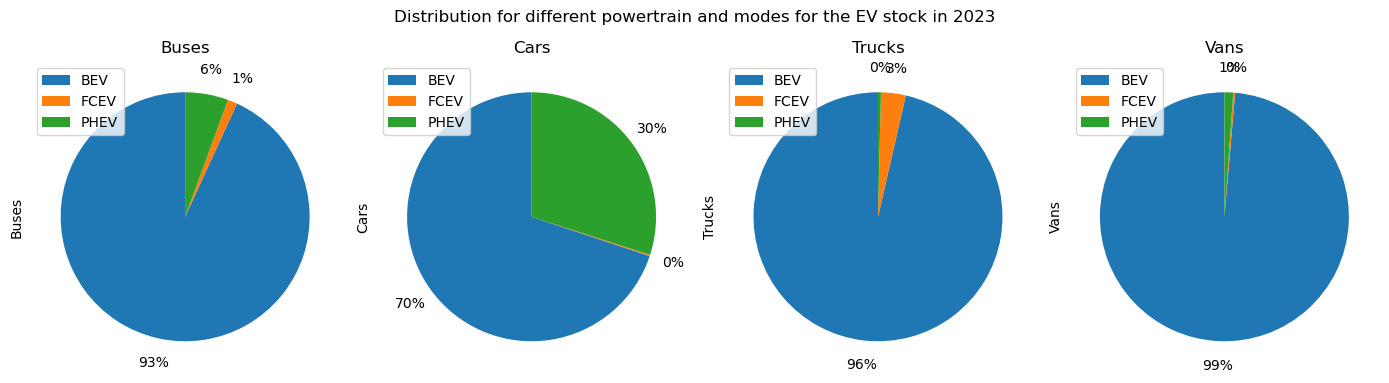

In [962]:
# Distribution for different powertrain and modes for the EV Stock in 2023
fig, ax= plt.subplots (1,4, figsize=(14,4))
EV_stock_2023_mode_pivot_transposed.plot(kind='pie', ax=ax[0], y='Buses', startangle=90, labels=None, autopct='%1.0f%%', pctdistance=1.2, legend= False)
ax[0].set_title('Buses')
ax[0].legend(['BEV', 'FCEV', 'PHEV'],loc='upper left')
EV_stock_2023_mode_pivot_transposed.plot(kind='pie', ax=ax[1], y='Cars', startangle=90, labels=None, autopct='%1.0f%%',pctdistance=1.2, legend= False)
ax[1].set_title('Cars')
ax[1].legend(['BEV', 'FCEV', 'PHEV'],loc='upper left')
EV_stock_2023_mode_pivot_transposed.plot(kind='pie', ax=ax[2], y='Trucks', startangle=90, labels=None, autopct='%1.0f%%',pctdistance=1.2, legend= False)
ax[2].set_title('Trucks')
ax[2].legend(['BEV', 'FCEV', 'PHEV'],loc='upper left')
EV_stock_2023_mode_pivot_transposed.plot(kind='pie', ax=ax[3], y='Vans', startangle=90, labels=None, autopct='%1.f%%',pctdistance=1.2, legend= False)
ax[3].set_title('Vans')
ax[3].legend(['BEV', 'FCEV', 'PHEV'],loc='upper left')
fig.suptitle ('Distribution for different powertrain and modes for the EV stock in 2023')
plt.tight_layout()
plt.show()

BEV and PHEV most significant role on Sales. Focus on these for the next analysis. Truck highest amount of FCEV?

**3.3 Distribution of sales and stock of EV Cars to different countries in the last year.**

In [965]:
# Why difference between World values and sum of all countries?
# Rundungsfehler?
#Zusammenfassen of Sales and Stock als zwei Diagramme nebeneinander
#Wie mit Null WErten umgehen? verfäöscht hier Rechnung

Focus on BEV & PHEV Cars only, because FCEV plays a subordinate role. And Focus on batteries instead of fuel cells.

In [1069]:
# Create DataFrame with Columns of each parameter (EV stock, EV sales,..) and powertrain (BEV and PHEV) for BEV & PHEV Cars
EV_cars_h_sales_stock=electromobility_df[(electromobility_df['category']=='Historical')&(electromobility_df['mode']=='Cars') & (electromobility_df['powertrain']!='FCEV') & ((electromobility_df['parameter']=='EV stock share') | (electromobility_df['parameter']=='EV sales share') | (electromobility_df['parameter']=='EV sales') | (electromobility_df['parameter']=='EV stock'))]
EV_h_charging_points=electromobility_df[(electromobility_df['category']=='Historical')&(electromobility_df['parameter']=='EV charging points')]

# Pivottable for historical EV Car stock and EV Car sales
EV_cars_h_sales_stock_pivot = EV_cars_h_sales_stock.pivot_table(index=['region', 'category', 'mode', 'year'], columns=['parameter','powertrain'], values='value').reset_index()
EV_cars_h_sales_stock_pivot.columns = ["_".join(pair) for pair in EV_cars_h_sales_stock_pivot.columns]
EV_cars_h_sales_stock_pivot=EV_cars_h_sales_stock_pivot.drop(columns='category_')
EV_cars_h_sales_stock_pivot=EV_cars_h_sales_stock_pivot.drop(columns='mode_')

# Pivottable for historical Charging Points
EV_h_charging_points_pivot=EV_h_charging_points.pivot_table(index=['region', 'category', 'mode', 'year'], columns=['parameter','powertrain'], values='value').reset_index()
EV_h_charging_points_pivot.columns = ["_".join(pair) for pair in EV_h_charging_points_pivot.columns]
EV_h_charging_points_pivot=EV_h_charging_points_pivot.drop(columns='category_')
EV_h_charging_points_pivot=EV_h_charging_points_pivot.drop(columns='mode_')

# merge both tables
EV_cars_h=pd.merge(EV_cars_h_sales_stock_pivot, EV_h_charging_points_pivot, how='outer', left_on=['year_', 'region_'], right_on = ['year_', 'region_'])
EV_cars_h=EV_cars_h.rename(columns= {'year_': 'year', 'region_':'region'})

# Add summeries
EV_cars_h['EV sales_Sum'] = EV_cars_h[['EV sales_BEV', 'EV sales_PHEV']].sum(axis=1, skipna=True)
EV_cars_h['EV stock_Sum']=EV_cars_h[['EV stock_BEV', 'EV stock_PHEV']].sum(axis=1, skipna=True)
EV_cars_h['EV charging points_sum']=EV_cars_h[['EV charging points_Publicly available fast', 'EV charging points_Publicly available slow']].sum(axis=1, skipna=True)
EV_cars_h.head()

,region,year,EV sales_BEV,EV sales_PHEV,EV sales share_EV,EV stock_BEV,EV stock_PHEV,EV stock share_EV,EV charging points_Publicly available fast,EV charging points_Publicly available slow,EV sales_Sum,EV stock_Sum,EV charging points_sum
0,Austria,2010,NaN,NaN,NaN,350.0,NaN,0.0079,NaN,NaN,0.0,350.0,0.0
1,Belgium,2010,48.0,8.0,0.01000,61.0,9.0,0.0013,NaN,NaN,56.0,70.0,0.0
2,Brazil,2010,10.0,NaN,0.00035,NaN,NaN,NaN,NaN,NaN,10.0,0.0,0.0
3,China,2010,1100.0,340.0,0.01000,1600.0,340.0,0.0031,NaN,NaN,1440.0,1940.0,0.0
4,Denmark,2010,NaN,NaN,NaN,59.0,20.0,0.0037,NaN,NaN,0.0,79.0,0.0


In [968]:
# EV Sales & Stock: Top Countries in 2023
EV_cars_h_2023=EV_cars_h[EV_cars_h['year']==2023]

#Focus on individual countries: exclude summary of countries
exclude_regions=['World', 'Europe', 'EU27']
EV_cars_h_2023=EV_cars_h_2023[~EV_cars_h_2023.region.isin(exclude_regions)]
EV_cars_h_2023.head()

,region,year,EV sales_BEV,EV sales_PHEV,EV sales share_EV,EV stock_BEV,EV stock_PHEV,EV stock share_EV,EV charging points_Publicly available fast,EV charging points_Publicly available slow,EV sales_Sum,EV stock_Sum,EV charging points_sum
569,Australia,2023,87000.0,11000.0,12.0,150000.0,31000.0,1.20,660.0,2100.0,98000.0,181000.0,2760.0
570,Austria,2023,48000.0,17000.0,26.0,160000.0,61000.0,4.40,2500.0,15000.0,65000.0,221000.0,17500.0
571,Belgium,2023,93000.0,100000.0,41.0,190000.0,280000.0,8.20,2000.0,42000.0,193000.0,470000.0,44000.0
572,Brazil,2023,19000.0,33000.0,3.0,33000.0,59000.0,0.21,4.9,3800.0,52000.0,92000.0,3804.9
573,Bulgaria,2023,1800.0,360.0,5.8,NaN,NaN,NaN,NaN,NaN,2160.0,0.0,0.0


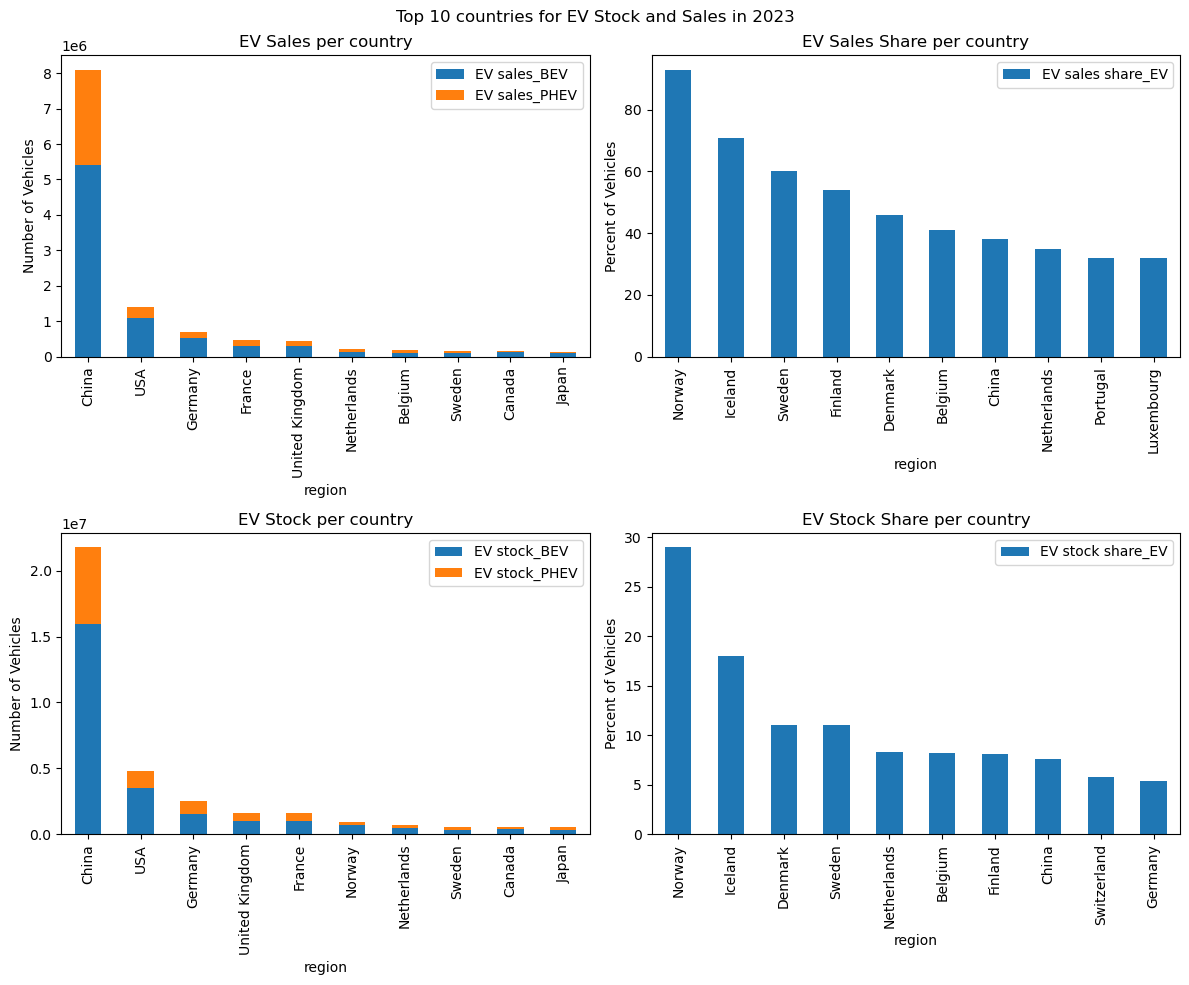

In [969]:
fig, ax= plt.subplots (2,2, figsize=(12,10))

#Top 10 countries for EV Sales in 2023
EV_cars_h_2023_sales=EV_cars_h_2023.sort_values(by='EV sales_Sum', ascending=False).head(10)
EV_cars_h_2023_sales[['region','EV sales_BEV', 'EV sales_PHEV']].plot(kind='bar',ax=ax[0,0],  x='region', stacked=True)
ax[0,0].set_title('EV Sales per country')
ax[0,0].set_ylabel('Number of Vehicles')

#Top 10 countries for EV Sales Share in 2023
EV_cars_h_2023_sales_share=EV_cars_h_2023.sort_values(by='EV sales share_EV', ascending=False).head(10)
EV_cars_h_2023_sales_share[['region', 'EV sales share_EV']].head(10).plot(kind='bar', ax=ax[0,1], x='region')
ax[0,1].set_title('EV Sales Share per country')
ax[0,1].set_ylabel('Percent of Vehicles')

#Top 10 countries for EV Stock in 2023
EV_cars_h_2023_stock=EV_cars_h_2023.sort_values(by='EV stock_Sum', ascending=False).head(10)
EV_cars_h_2023_stock[['region','EV stock_BEV', 'EV stock_PHEV']].head(10).plot(kind='bar',ax=ax[1,0],  x='region', stacked=True)
ax[1,0].set_title('EV Stock per country')
ax[1,0].set_ylabel('Number of Vehicles')

#Top 10 countries for EV Stock Share in 2023
EV_cars_h_2023_stock_share=EV_cars_h_2023.sort_values(by='EV stock share_EV', ascending=False).head(10)
EV_cars_h_2023_stock_share[['region', 'EV stock share_EV']].head(10).plot(kind='bar', ax=ax[1,1], x='region')
ax[1,1].set_title('EV Stock Share per country')
ax[1,1].set_ylabel('Percent of Vehicles')
fig.suptitle ('Top 10 countries for EV Stock and Sales in 2023')
plt.tight_layout()
plt.show()

China has by far the largest sales market for electric cars. But it is also a very large country. Therefore the focus will be on the Sales Share in the next step. The sales share of electric cars is particularly high in the Scandinavian countries.
Distribution of PHEV to BEV is similar to wordl wide, no countrie sticht hervor.

**3.4 Development of EV Car sales and stock for different regions since 2010**

In [972]:
# Look at USA, Europe and China
include_regions=['USA', 'Europe', 'China'] 
EV_cars_h_USA_Europe_China=EV_cars_h[EV_cars_h.region.isin(include_regions)]
EV_cars_h_USA_Europe_China=EV_cars_h_USA_Europe_China[['region', 'year', 'EV stock_Sum']]
EV_cars_h_USA_Europe_China_pivot=EV_cars_h_USA_Europe_China.pivot_table(index=['year'], columns='region', values='EV stock_Sum')

# Definition of other countries as all countries beside 'include regions'
other_regions=['Australia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'India', 'Indonesia', 'Israel', 'Japan','Korea', 'Mexico','New Zealand', 'Rest of the world', 'Seychelles', 'South Africa', 'Thailand', 'Turkiye', 'United Arab Emirates']
EV_cars_h_other_countries=EV_cars_h[EV_cars_h.region.isin(other_regions)]
EV_cars_h_other_countries_pivot=pd.DataFrame(EV_cars_h_other_countries.groupby('year')['EV stock_Sum'].sum())

# merge tables
EV_cars_h_countries=pd.merge(EV_cars_h_USA_Europe_China_pivot,EV_cars_h_other_countries_pivot, how='inner', on='year')
EV_cars_h_countries=EV_cars_h_countries.rename(columns={'EV stock_Sum': 'Other countries'})
EV_cars_h_countries.head()

,China,Europe,USA,Other countries
year,,,,
2010,1940.0,9863.0,3800.0,4461.0
2011,6960.0,20510.0,22000.0,18617.0
2012,16920.0,46700.0,75000.0,48747.0
2013,32600.0,104000.0,172000.0,81678.0
2014,85000.0,200000.0,290000.0,133283.0


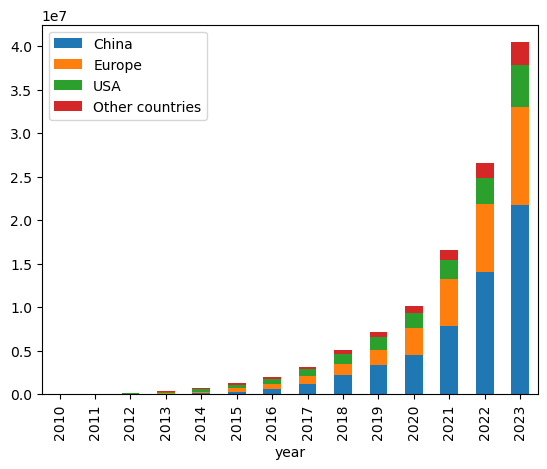

In [973]:
EV_cars_h_countries.plot(kind='bar', stacked='True')
plt.show()

In [ ]:
# größte Steigerung an stock share in letzten 5 Jahren?

China plays most important role over the years. Followed by Europe and USA. Other countries play a subordinate role.

**3.5 Correlation between Charging points, EV Car stock and Sales**

In [976]:
#Correlation between chargign Points and Sales?
#Länder/ Regionen mit höchsten Anteil an EVs, höchster Anteil an EVs Sales vs EV Stock

In [977]:
#Correlation Assignment in Excel

In [1120]:
# hierfür ebenfalls EV_cars_h verwenden statt einzelne Tables zu erstellen
EV_cars_h.head()

,region,year,EV sales_BEV,EV sales_PHEV,EV sales share_EV,EV stock_BEV,EV stock_PHEV,EV stock share_EV,EV charging points_Publicly available fast,EV charging points_Publicly available slow,EV sales_Sum,EV stock_Sum,EV charging points_sum,share of fast charging points
0,Austria,2010,NaN,NaN,NaN,350.0,NaN,0.0079,NaN,NaN,0.0,350.0,0.0,NaN
1,Belgium,2010,48.0,8.0,0.01000,61.0,9.0,0.0013,NaN,NaN,56.0,70.0,0.0,NaN
2,Brazil,2010,10.0,NaN,0.00035,NaN,NaN,NaN,NaN,NaN,10.0,0.0,0.0,NaN
3,China,2010,1100.0,340.0,0.01000,1600.0,340.0,0.0031,NaN,NaN,1440.0,1940.0,0.0,NaN
4,Denmark,2010,NaN,NaN,NaN,59.0,20.0,0.0037,NaN,NaN,0.0,79.0,0.0,NaN


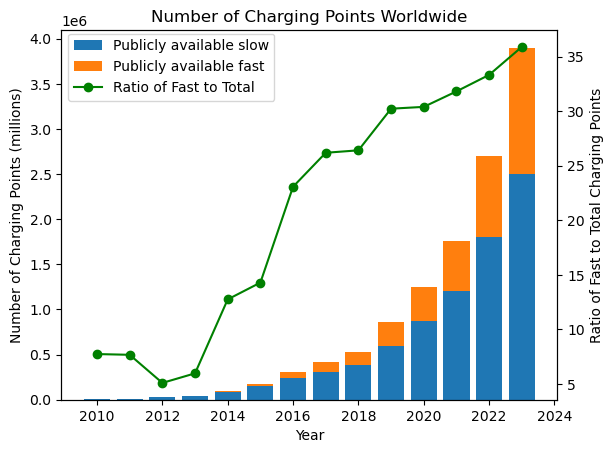

In [1092]:
# Worldwide development of Charging Points
EV_cars_h['share of fast charging points']=EV_cars_h['EV charging points_Publicly available fast']/(EV_cars_h['EV charging points_Publicly available fast'] + EV_cars_h['EV charging points_Publicly available slow'])*100
EV_cars_h_gl=EV_cars_h[EV_cars_h['region']=='World']

fig, ax1 = plt.subplots() 
ax1.bar(EV_cars_h_gl['year'], EV_cars_h_gl['EV charging points_Publicly available slow'], label='Publicly available slow') 
ax1.bar(EV_cars_h_gl['year'], EV_cars_h_gl['EV charging points_Publicly available fast'], label='Publicly available fast', bottom=EV_cars_h_gl['EV charging points_Publicly available slow']) 
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Charging Points (millions)') 
ax1.set_title('Number of Charging Points Worldwide') 
ax2 = ax1.twinx() 
ax2.plot(EV_cars_h_gl['year'], EV_cars_h_gl['share of fast charging points'], label='Ratio of Fast to Total', color='green', marker='o') 
ax2.set_ylabel('Ratio of Fast to Total Charging Points') 
fig.legend(loc='center left', bbox_to_anchor=(0, 0.9), bbox_transform=ax1.transAxes)
plt.show()

Anteil and Fast Charging points is going up. Positiv, macht Elektroautos attraktiver.

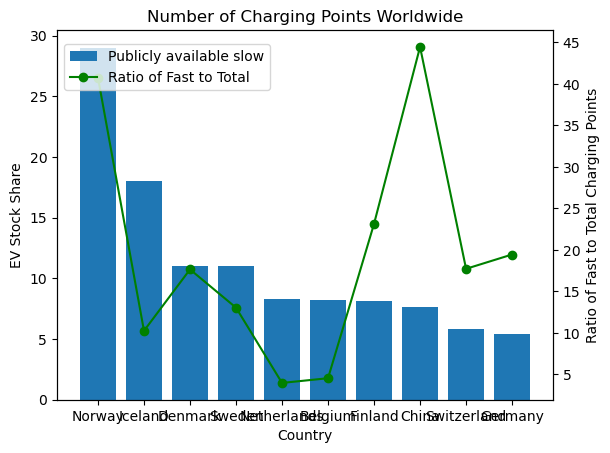

In [1126]:
EV_cars_h_2023=EV_cars_h[EV_cars_h['year']==2023]
exclude_regions=['World', 'Europe', 'EU27']
EV_cars_h_2023=EV_cars_h_2023[~EV_cars_h_2023.region.isin(exclude_regions)]
EV_cars_h_2023_sorted=EV_cars_h_2023.sort_values(by='EV stock share_EV', ascending=False).head(10)

fig, ax1 = plt.subplots() 
ax1.bar(EV_cars_h_2023_sorted['region'], EV_cars_h_2023_sorted['EV stock share_EV'], label='Publicly available slow') 
ax1.set_xlabel('Country')
ax1.set_ylabel('EV Stock Share') 
ax1.set_title('Number of Charging Points Worldwide') 
ax2 = ax1.twinx()
ax2.plot(EV_cars_h_2023_sorted['region'], EV_cars_h_2023_sorted['share of fast charging points'], label='Ratio of Fast to Total', color='green', marker='o') 
ax2.set_ylabel('Ratio of Fast to Total Charging Points') 
fig.legend(loc='center left', bbox_to_anchor=(0, 0.9), bbox_transform=ax1.transAxes)
plt.show()


In [1128]:
EV_cars_h_2023_sorted['share of fast charging points'].corr(EV_cars_h_2023_sorted['EV stock share_EV'])

0.35620502893017575

In [980]:
# Country with most Fastcharging ratio in 2023?

In [981]:
# Country with most Fc per Car

In [982]:
EV_charging_points_h_pivot[EV_charging_points_h_pivot['year']==2023].sort_values(by='share of fast charging points', ascending=False)

powertrain,region,category,mode,year,Publicly available fast,Publicly available slow,share of fast charging points
252,New Zealand,Historical,EV,2023,860.0,280.0,75.438596
296,South Africa,Historical,EV,2023,160.0,140.0,53.333333
71,China,Historical,EV,2023,1200000.0,1500000.0,44.444444
266,Norway,Historical,EV,2023,11000.0,16000.0,40.740741
289,Portugal,Historical,EV,2023,3800.0,5600.0,40.425532
175,India,Historical,EV,2023,4100.0,6800.0,37.614679
390,World,Historical,EV,2023,1400000.0,2500000.0,35.897436
338,Thailand,Historical,EV,2023,770.0,1500.0,33.920705
61,Chile,Historical,EV,2023,330.0,740.0,30.841121
214,Japan,Historical,EV,2023,9600.0,22000.0,30.379747


In [983]:
# correlation between Chargign points and Sales
# Correlation between Fastcharging Points and Sales

In [984]:
EV_stock_h_gl_all_vehicles=pd.DataFrame(EV_stock_h_gl.groupby('year')['number of vehicles'].sum())
EV_sales_h_gl_all_vehicles=pd.DataFrame(EV_sales_h_gl.groupby('year')['number of vehicles'].sum())
EV_charging_points_h_gl_all_points=pd.DataFrame(EV_charging_points_h_gl.groupby('year')['number of charging points'].sum())

test=pd.merge(EV_sales_h_gl_all_vehicles, EV_stock_h_gl_all_vehicles, how='inner',on='year')
test2=pd.merge(test, EV_charging_points_h_gl_all_points, how='inner',on='year')
test3= pd.merge(EV_charging_points_h_gl_pivot, test2, how='inner',on='year')

In [985]:
test3

,region,category,mode,year,Publicly available fast,Publicly available slow,share of fast charging points,number of vehicles_x,number of vehicles_y,number of charging points
0,World,Historical,EV,2010,310.0,3700.0,7.730673,10318.0,37367.0,4010.0
1,World,Historical,EV,2011,830.0,10000.0,7.663897,53778.0,90309.0,10830.0
2,World,Historical,EV,2012,1500.0,28000.0,5.084746,133079.0,225707.0,29500.0
3,World,Historical,EV,2013,2600.0,41000.0,5.963303,216041.0,439378.0,43600.0
4,World,Historical,EV,2014,13000.0,89000.0,12.745098,351555.0,791920.0,102000.0
5,World,Historical,EV,2015,25000.0,150000.0,14.285714,653630.0,1459801.0,175000.0
6,World,Historical,EV,2016,72000.0,240000.0,23.076923,917621.0,2420951.0,312000.0
7,World,Historical,EV,2017,110000.0,310000.0,26.190476,1430348.0,3761685.0,420000.0
8,World,Historical,EV,2018,140000.0,390000.0,26.415094,2269497.0,6099436.0,530000.0
9,World,Historical,EV,2019,260000.0,600000.0,30.232558,2248327.0,8293958.0,860000.0


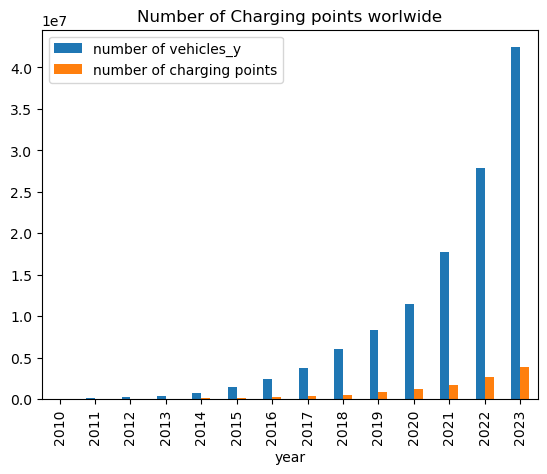

In [986]:
test3[['year', 'number of vehicles_y', 'number of charging points']].plot(kind='bar', x='year')#, stacked='True')
plt.title('Number of Charging points worlwide')
plt.show()

In [987]:
test3[[ 'share of fast charging points', 'Publicly available slow', 'Publicly available fast', 'number of charging points', 'number of vehicles_x',	'number of vehicles_y']].corr()

,share of fast charging points,Publicly available slow,Publicly available fast,number of charging points,number of vehicles_x,number of vehicles_y
share of fast charging points,1.000000,0.794675,0.747270,0.778676,0.745122,0.757892
Publicly available slow,0.794675,1.000000,0.995603,0.999449,0.991823,0.996560
Publicly available fast,0.747270,0.995603,1.000000,0.998164,0.992483,0.999249
number of charging points,0.778676,0.999449,0.998164,1.000000,0.993056,0.998517
number of vehicles_x,0.745122,0.991823,0.992483,0.993056,1.000000,0.994921
number of vehicles_y,0.757892,0.996560,0.999249,0.998517,0.994921,1.000000


In [988]:
test2.corr()

,number of vehicles_x,number of vehicles_y,number of charging points
number of vehicles_x,1.000000,0.994921,0.993056
number of vehicles_y,0.994921,1.000000,0.998517
number of charging points,0.993056,0.998517,1.000000


In [989]:
EV_charging_points_h=EV_charging_points[EV_charging_points['category']=='Historical']
EV_charging_points_h_pivot = EV_charging_points_h.pivot_table(index=['region', 'category', 'mode', 'year'], columns='powertrain', values='number of charging points').reset_index()
EV_charging_points_h_pivot['share of fast charging points']=EV_charging_points_h_pivot['Publicly available fast']/(EV_charging_points_h_pivot['Publicly available fast'] + EV_charging_points_h_pivot['Publicly available slow'])*100
EV_charging_points_h_pivot

powertrain,region,category,mode,year,Publicly available fast,Publicly available slow,share of fast charging points
0,Australia,Historical,EV,2017,40.0,440.0,8.333333
1,Australia,Historical,EV,2018,61.0,670.0,8.344733
2,Australia,Historical,EV,2019,NaN,1700.0,NaN
3,Australia,Historical,EV,2020,NaN,2300.0,NaN
4,Australia,Historical,EV,2021,320.0,2000.0,13.793103
...,...,...,...,...,...,...,...
386,World,Historical,EV,2019,260000.0,600000.0,30.232558
387,World,Historical,EV,2020,380000.0,870000.0,30.400000
388,World,Historical,EV,2021,560000.0,1200000.0,31.818182
389,World,Historical,EV,2022,900000.0,1800000.0,33.333333


In [990]:
EV_stock_h_all_vehicles=pd.DataFrame(EV_stock_h_cars.groupby(['year', 'region'])['number of vehicles'].sum())
EV_sales_h_all_vehicles=pd.DataFrame(EV_sales_h_cars.groupby(['year', 'region'])['number of vehicles'].sum())
EV_charging_points_h_all_points=pd.DataFrame(EV_charging_points_h.groupby(['year', 'region'])['number of charging points'].sum())

test4=pd.merge(EV_sales_h_all_vehicles, EV_stock_h_all_vehicles, how='inner',on=['year', 'region'])
test5=pd.merge(test4, EV_charging_points_h_all_points, how='inner',on=['year', 'region'])
test6= pd.merge(test5, EV_charging_points_h_pivot, how='inner',on=['year', 'region'])
test6=test6.rename(columns={'number of vehicles_x': 'EV_sales', 'number of vehicles_y': 'EV_stock'})
test6['Charging points per EV']=test6['number of charging points']/test6['EV_stock']
test6

,year,region,EV_sales,EV_stock,number of charging points,category,mode,Publicly available fast,Publicly available slow,share of fast charging points,Charging points per EV
0,2010,EU27,1191.0,4940.0,7300.0,Historical,EV,NaN,7300.0,NaN,1.477733
1,2010,Europe,1810.0,9863.0,3200.0,Historical,EV,NaN,3200.0,NaN,0.324445
2,2010,Japan,2400.0,3500.0,310.0,Historical,EV,310.0,NaN,NaN,0.088571
3,2010,Netherlands,120.0,281.0,400.0,Historical,EV,NaN,400.0,NaN,1.423488
4,2010,Norway,360.0,2702.0,2800.0,Historical,EV,NaN,2800.0,NaN,1.036269
...,...,...,...,...,...,...,...,...,...,...,...
372,2023,Switzerland,76000.0,276000.0,15800.0,Historical,EV,2800.0,13000.0,17.721519,0.057246
373,2023,Turkiye,68700.0,81900.0,7800.0,Historical,EV,800.0,7000.0,10.256410,0.095238
374,2023,USA,1390000.0,4800000.0,183000.0,Historical,EV,43000.0,140000.0,23.497268,0.038125
375,2023,United Kingdom,450000.0,1580000.0,53000.0,Historical,EV,10000.0,43000.0,18.867925,0.033544


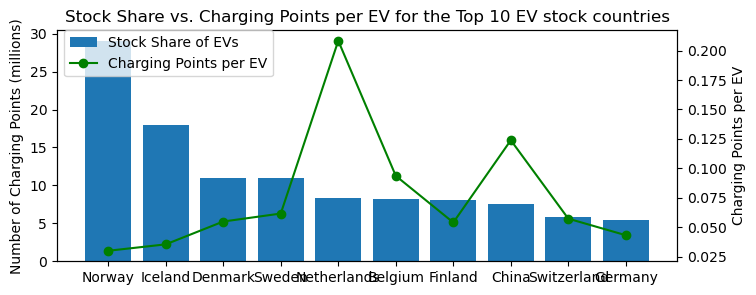

In [991]:
test6_2023=test6[test6['year']==2023].sort_values(by='EV_stock', ascending=False)
test6_2023

testtest=pd.merge(EV_stock_share_cars_2023_top_countries, test6_2023, how='inner', on='region')
testtest

fig, ax1 = plt.subplots(figsize=(8,3)) 
ax1.bar(testtest['region'], testtest['percent of vehicles'], label='Stock Share of EVs') 
ax1.set_ylabel('Number of Charging Points (millions)') 
ax1.set_title('Stock Share vs. Charging Points per EV for the Top 10 EV stock countries') 
ax2 = ax1.twinx() 
ax2.plot(testtest['region'], testtest['Charging points per EV'], label='Charging Points per EV', color='green', marker='o') 
ax2.set_ylabel('Charging Points per EV') 
fig.legend(loc='center left', bbox_to_anchor=(0, 0.9), bbox_transform=ax1.transAxes)
plt.show()

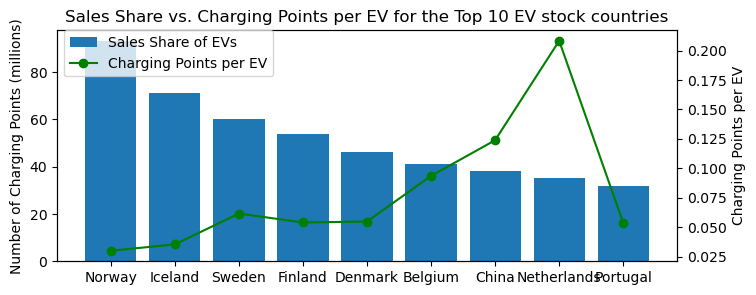

In [992]:

testtest2=pd.merge(EV_sales_share_cars_2023_top_countries, test6_2023, how='inner', on='region')

fig, ax1 = plt.subplots(figsize=(8,3)) 
ax1.bar(testtest2['region'], testtest2['percent of vehicles'], label='Sales Share of EVs') 
ax1.set_ylabel('Number of Charging Points (millions)') 
ax1.set_title('Sales Share vs. Charging Points per EV for the Top 10 EV stock countries') 
ax2 = ax1.twinx() 
ax2.plot(testtest2['region'], testtest2['Charging points per EV'], label='Charging Points per EV', color='green', marker='o') 
ax2.set_ylabel('Charging Points per EV') 
fig.legend(loc='center left', bbox_to_anchor=(0, 0.9), bbox_transform=ax1.transAxes)
plt.show()

In [993]:
test6_2023['Charging points per EV'].corr(test6['EV_stock'])

0.043176427141945715

In [994]:
test6_2023['Charging points per EV'].corr(test6['EV_sales'])

0.05107202063130938

In [995]:
test6_2023[[ 'Charging points per EV','share of fast charging points', 'Publicly available slow', 'Publicly available fast', 'number of charging points', 'EV_sales',	'EV_stock']].corr()

,Charging points per EV,share of fast charging points,Publicly available slow,Publicly available fast,number of charging points,EV_sales,EV_stock
Charging points per EV,1.000000,-0.177805,0.110433,0.088723,0.102943,0.051072,0.043176
share of fast charging points,-0.177805,1.000000,0.204240,0.274140,0.233022,0.221589,0.211303
Publicly available slow,0.110433,0.204240,1.000000,0.965198,0.994855,0.996520,0.994006
Publicly available fast,0.088723,0.274140,0.965198,1.000000,0.986726,0.965182,0.948608
number of charging points,0.102943,0.233022,0.994855,0.986726,1.000000,0.992688,0.984706
EV_sales,0.051072,0.221589,0.996520,0.965182,0.992688,1.000000,0.998194
EV_stock,0.043176,0.211303,0.994006,0.948608,0.984706,0.998194,1.000000


In [996]:
test7=test6[test6['region']== 'World']
test7

,year,region,EV_sales,EV_stock,number of charging points,category,mode,Publicly available fast,Publicly available slow,share of fast charging points,Charging points per EV
6,2010,World,7450.0,20400.0,4010.0,Historical,EV,310.0,3700.0,7.730673,0.196569
16,2011,World,49000.0,67500.0,10830.0,Historical,EV,830.0,10000.0,7.663897,0.160444
33,2012,World,120000.0,190000.0,29500.0,Historical,EV,1500.0,28000.0,5.084746,0.155263
56,2013,World,201000.0,390000.0,43600.0,Historical,EV,2600.0,41000.0,5.963303,0.111795
81,2014,World,330000.0,710000.0,102000.0,Historical,EV,13000.0,89000.0,12.745098,0.143662
109,2015,World,550000.0,1250000.0,175000.0,Historical,EV,25000.0,150000.0,14.285714,0.140000
139,2016,World,760000.0,2010000.0,312000.0,Historical,EV,72000.0,240000.0,23.076923,0.155224
172,2017,World,1180000.0,3100000.0,420000.0,Historical,EV,110000.0,310000.0,26.190476,0.135484
206,2018,World,2060000.0,5200000.0,530000.0,Historical,EV,140000.0,390000.0,26.415094,0.101923
240,2019,World,2080000.0,7200000.0,860000.0,Historical,EV,260000.0,600000.0,30.232558,0.119444


In [997]:
test7[[ 'Charging points per EV','share of fast charging points', 'Publicly available slow', 'Publicly available fast', 'number of charging points', 'EV_sales',	'EV_stock']].corr()

,Charging points per EV,share of fast charging points,Publicly available slow,Publicly available fast,number of charging points,EV_sales,EV_stock
Charging points per EV,1.000000,-0.689760,-0.664893,-0.630473,-0.653365,-0.647044,-0.641586
share of fast charging points,-0.689760,1.000000,0.794675,0.747270,0.778676,0.738392,0.745271
Publicly available slow,-0.664893,0.794675,1.000000,0.995603,0.999449,0.991268,0.995090
Publicly available fast,-0.630473,0.747270,0.995603,1.000000,0.998164,0.992415,0.999391
number of charging points,-0.653365,0.778676,0.999449,0.998164,1.000000,0.992673,0.997616
EV_sales,-0.647044,0.738392,0.991268,0.992415,0.992673,1.000000,0.994968
EV_stock,-0.641586,0.745271,0.995090,0.999391,0.997616,0.994968,1.000000


In [998]:
EV_sales_cars_2023_top_countries

powertrain,region,category,mode,year,BEV,PHEV,Sum of EV
7,China,Historical,Cars,2023,5400000.0,2700000.0,8100000.0
46,USA,Historical,Cars,2023,1100000.0,290000.0,1390000.0
17,Germany,Historical,Cars,2023,520000.0,180000.0,700000.0
16,France,Historical,Cars,2023,310000.0,160000.0,470000.0
48,United Kingdom,Historical,Cars,2023,310000.0,140000.0,450000.0
31,Netherlands,Historical,Cars,2023,130000.0,80000.0,210000.0
2,Belgium,Historical,Cars,2023,93000.0,100000.0,193000.0
43,Sweden,Historical,Cars,2023,110000.0,61000.0,171000.0
5,Canada,Historical,Cars,2023,130000.0,41000.0,171000.0
25,Japan,Historical,Cars,2023,88000.0,52000.0,140000.0


In [999]:
# Klare Korrelation zwischen EV Stock und Charging Points

In [1000]:
#Ist Anteil an LAdesäulen pro Elektroauto am höchsten in den Ländern mit den meisten Sales/Stock
#Ist dort auch Fastscharging Anteil am höchsten?

In [1001]:
# Korrelation between Fast Charging und EV Sales?

**3.6. Forecast for different scenarios**

In [1003]:
# Seigerung für Klimawandel notwendig
# 2 Prognose Scenarios

## 4. Conclusion and Outlook

In [1005]:
# Results: hier darstellen und nochmals in PowerBi als Dashboard

In [1006]:
# Next steps:
# check subsidies in the countries; influence?
# check References, not all work

**References**: #check if References work

[1] R. K. Pachauri and L. Mayer, eds., Climate change 2014: Synthesis report, Intergovern-mental Panel on Climate Change, Geneva, Switzerland, 2015 

[2] O. Edenhofer, ed., Renewable energy sources and climate change mitigation: Special Re-port of the intergovernmental panel on climate change  Cambridge University Press, Cambridge, 201
 
[3] “European Union, https://ec.europa.eu/clima/policies/international/negotiations/paris_)

[4] “European Union, https://ec.europa.eu/clima/policies/transport_en”

[5] “https://www.eea.europa.eu/data-and-maps/indicators/transport-emissions-of-green-house-gases-7/assessment”


[6] "https://www.iea.org/data-and-statistics/data-product/global-ev-outlook-2024#overview",”.
